In [10]:
from UNetDataset import UNetDataset
from Unet2d import UNet
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import smtplib, ssl
import torchvision
from torch.utils.tensorboard import SummaryWriter
import numpy as np
import sys
import torch

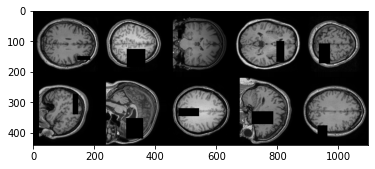

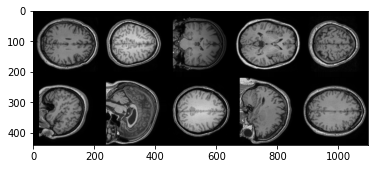

In [11]:
%reload_ext tensorboard

writer = SummaryWriter("runs/IXI_2DUNet_4.0")

# IXI dataset path
MNI_data_path = '/Users/gabriellakamlish/BrainResection/IXI/IXI_MNI'
IXI_dataset = UNetDataset(MNI_data_path)

trainloader = DataLoader(IXI_dataset, batch_size=20,shuffle=True, num_workers=0)

valloader = DataLoader(IXI_dataset, batch_size=20,shuffle=True, num_workers=0)

# get some random training images
examples = iter(trainloader)
example_images, example_labels = examples.next()
img_grid = torchvision.utils.make_grid(example_images[:10,:,:,:], nrow=5)

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(img_grid)
writer.add_image('4.0 images', img_grid)

img_grid_labels = torchvision.utils.make_grid(example_labels[:10,:,:,:], nrow=5)
imshow(img_grid_labels)

writer.add_image('4.0 labels', img_grid_labels)

In [12]:
neural_net = UNet()

criterion = nn.MSELoss()
optimizer = optim.Adam(neural_net.parameters(), lr=0.001)

training_iterations = 15

running_loss = 0.0
val_loss = 0.0
n_total_steps = len(trainloader)

for epoch in range(training_iterations):  # loop over the dataset multiple times

    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        inputs = inputs.float()
        labels = labels.float()

        outputs = neural_net(inputs)
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()

        if i % 10 ==9:    # print every 2 mini-batches
            print(f'Epoch [{epoch+1}], Loss: {loss.item():.4f}')
            writer.add_scalar('new training loss', running_loss/10, epoch*n_total_steps+i)
            running_loss = 0.0
    
    neural_net.eval()
    with torch.no_grad():
        for i, data in enumerate(valloader, 0):
            # Forward pass
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data

            outputs = neural_net(inputs)
            # 
            loss = criterion(outputs, labels)
            # Multiply average loss times the number of examples in batch
            val_loss += loss.item() * inputs.size(0)
            if i % 10 ==9:    # print every 2 mini-batches
                    print(f'Epoch [{epoch+1}], Val Loss: {loss.item():.4f}')
                    writer.add_scalar('validation loss', val_loss/10, epoch*n_total_steps+i)
                    val_loss = 0.0

print('Finished Training')

Epoch [1], Loss: 0.0111
Epoch [1], Loss: 0.0079


NameError: name 'valid_loss' is not defined

In [ ]:
writer.close()